In [1]:
import numpy as np

In [2]:
import scipy.constants as cnts

In [3]:
cnts.pi

3.141592653589793

In [4]:
cnts.h

6.62607004e-34

In [5]:
cnts.G

6.67408e-11

In [6]:
cnts.g

9.80665

In [7]:
cnts.R

8.3144598

In [8]:
cnts.k

1.38064852e-23

In [9]:
cnts.N_A

6.022140857e+23

In [10]:
cnts.sigma

5.670367e-08

In [11]:
cnts.Rydberg

10973731.568508

In [12]:
cnts.m_e

9.10938356e-31

In [13]:
cnts.m_p

1.672621898e-27

In [14]:
import scipy.linalg as sla

In [18]:
a=np.array([[3,2,-1],[2,13,-3],[1,1,-2]])
a

array([[ 3,  2, -1],
       [ 2, 13, -3],
       [ 1,  1, -2]])

In [19]:
sla.det(a)

-56.0

In [20]:
b=np.array([[2,3,4],[4,3,1],[1,2,4]])
b

array([[2, 3, 4],
       [4, 3, 1],
       [1, 2, 4]])

In [21]:
sla.inv(b)

array([[-2. ,  0.8,  1.8],
       [ 3. , -0.8, -2.8],
       [-1. ,  0.2,  1.2]])

In [25]:
eigen_values,eigen_vectors=sla.eig(a)

In [26]:
eigen_values

array([13.14322803+0.j,  2.53652826+0.j, -1.6797563 +0.j])

In [27]:
eigen_vectors

array([[-0.18557045, -0.97364171,  0.13076205],
       [-0.9796138 ,  0.13297209,  0.1813737 ],
       [-0.07694424, -0.18531123,  0.97468193]])

In [28]:
sla.eig(b)[0]

array([ 7.90848465+0.j, -0.41865085+0.j,  1.5101662 +0.j])

In [29]:
sla.eig(b)[1]

array([[-0.63230819, -0.60401675,  0.15254691],
       [-0.6120417 ,  0.76849341, -0.7995133 ],
       [-0.47496453, -0.21114365,  0.58095432]])

**Solve this set equations**

$4x-2y+3z=1$

$x+3y-4z=-7$

$3x+y+2z=5$

In [30]:
c=np.array([[4,-2,3],[1,3,-4],[3,1,2]])
d=np.array([1,-7,5])
sla.solve(c,d)

array([-1.,  2.,  3.])

In [31]:
from scipy.optimize import minimize

In [32]:
def fnc(pr):
    x,v=pr[0],pr[1]
    fn=(x**2+1)**0.5/v+((2-x)**2+2**2)**0.5*v
    return fn
pr=[1.0,1.0]
res=minimize(fnc,pr,method='Nelder-Mead',options={'xtol':1e-5,'disp':True})
print('[x,v]=',res.x)

Optimization terminated successfully.
         Current function value: 3.310029
         Iterations: 46
         Function evaluations: 89
[x,v]= [0.26486488 0.62505913]


$f(x_0,x_1,\cdots ,x_{n-1})=\sum_{i=0}^{n-2} 100(x_{i+1}-x_i^2)^2+(1-x_i)^2$

In [36]:
def rosen(x):
    n=len(x)
    ros=0
    for i in range(n-1):
        term1=(x[i+1]-x[i]**2)**2
        term2=(1-x[i])**2
        ros+=100*term1+term2
    return ros

x=np.array([1.3,0.7,0.8,1.9,3.2,0.9]) # arbitrary initial choice
res=minimize(rosen,x,method='Nelder-Mead',options={'xtol':1e-8,'disp':True})
print('Optimized parameters array',res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 690
         Function evaluations: 1083
Optimized parameters array [1.         1.         1.         1.         1.         0.99999999]


$f(a,x)=a_0x^{a_1}e^{a_2x}$

$\chi^2(a_0,a_1,a_2)=\sum_{i=0}^{n-1}(f(x_i^2,a_0,a_1,a_2)-y_i)^2$

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 83
         Function evaluations: 159
fitting parameters: [ 1.57257142  1.22156543 -0.66653395]


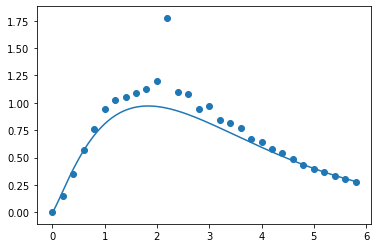

In [52]:
import matplotlib.pyplot as plt

def fnc(x,a):
    return a[0]*x**a[1]*np.exp(a[2]*x)

def fit(a,f,x,fx): #chi^2
    chi2=0
    for i in range(len(x)):
        fx_y2=(f(x[i],a)-fx[i])**2
        chi2=fx_y2
    return chi2

x,fx=[],[]
fr=open('fitData.prn','r')
while True:
    line=fr.readline()
    if not line:
        break
    x.append(float(line.split()[0]))
    fx.append(float(line.split()[1]))
fr.close()

a=[1,1,1] # initial values of fitting parameters
res=minimize(fit,a,args=(fnc,x,fx),method='Nelder-Mead',options={'xtol':1e-5,'adaptive':True,'disp':True})
a=res.x
print('fitting parameters:',a)
x=np.asarray(x)
fx=np.asarray(fx)
xx=np.arange(x[0],x[len(x)-1],0.01)
y=fnc(xx,a)
plt.scatter(x,fx) # plot the data
plt.plot(xx,y) #plot the fit
plt.show()
